In [9]:
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PolyCollection
import os

In [78]:
run_dir = 'data/RR_201'

In [75]:
stat_stats = {
    'processes': ['running', 'switching', 'ready', 'blocked', 'exit'],
    'cpus': ['processing', 'assigned_idle', 'idle', 'switching_out', 'switching_in']
}
in_dir = f"inputs"
out_dir = f"outputs"
in_type = 'csv'
out_type = 'jpg'
tick_separation = 1
bar_width = 0.9
bar_pm = bar_width/2

curr_dir = run_dir
for run_folder in os.listdir(curr_dir):
    if run_folder.find('.') == -1:
        curr_dir = f"{run_dir}/{run_folder}"
        for chart_folder in os.listdir(curr_dir):
            curr_dir = f"{run_dir}/{run_folder}/{chart_folder}"
            for type_folder in os.listdir(curr_dir):
                curr_dir = f"{run_dir}/{run_folder}/{chart_folder}/{type_folder}"
                states = stat_stats[type_folder]
                cats = {states[i]:(i+1)*tick_separation for i in range(0, len(states))}
                color_map = {states[i]:f"C{i}" for i in range(0, len(states))}
                try:
                    os.mkdir(f"{curr_dir}/{out_dir}")
                except OSError:
                    0
                else:
                    print(f"Created output folder {curr_dir}/{out_dir}")
                    for filename in os.listdir(f"{curr_dir}/{in_dir}"):
                        if filename.endswith(f".{in_type}"):
                            df = pd.read_csv(f"{curr_dir}/{in_dir}/{filename}")
                            colors = [color_map[row[0]] for row in df.values]
                            fig, ax = plt.subplots()
                            # CHART TYPE SPLIT
                            if chart_folder == 'timelines':
                                df.columns = ['state', 'start']
                                df['start'] = df.expanding(1).sum()
                                df['end'] = df['start']
                                df['start'] = df['start'].shift(1)
                                df.at[0, 'start'] = 0

                                verts = [[(row[1], cats[row[0]]-bar_pm), (row[1], cats[row[0]]+bar_pm), (row[2], cats[row[0]]+bar_pm), (row[2], cats[row[0]]-bar_pm), (row[1], cats[row[0]]-bar_pm)] for row in df.values]

                                bars = PolyCollection(verts, facecolors=colors)
                                ax.add_collection(bars)
                                ax.autoscale()

                                if tick_separation == 0:
                                    plt.legend(handles=[mpatches.Patch(color=m[1], label=m[0]) for m in color_map.items()])
                                    ax.set_yticks([])
                                else:
                                    ax.set_yticks(arange(tick_separation, (len(states)+1)*tick_separation, tick_separation))
                                    ax.set_yticklabels(states)
                            elif chart_folder == 'piecharts':
                                df.columns = ['state', 'length']
                                ax.pie(df['length'], labels=df['state'], colors=colors, autopct='%1.1f%%')
                                ax.axis('equal')
                            
                            plt.savefig(f"{curr_dir}/{out_dir}/{filename.rstrip(in_type)}{out_type}")
                            #print(f"Created plot {curr_dir}/{out_dir}/{filename.rstrip(in_type)}{out_type}")
                            plt.close()

Created output folder data/RR_201/10_50_201_7_3/piecharts/cpus/outputs
Created output folder data/RR_201/10_50_201_7_3/piecharts/processes/outputs
Created output folder data/RR_201/10_50_201_7_3/timelines/cpus/outputs
Created output folder data/RR_201/10_50_201_7_3/timelines/processes/outputs
Created output folder data/RR_201/1_50_201_7_3/piecharts/cpus/outputs
Created output folder data/RR_201/1_50_201_7_3/piecharts/processes/outputs
Created output folder data/RR_201/1_50_201_7_3/timelines/cpus/outputs
Created output folder data/RR_201/1_50_201_7_3/timelines/processes/outputs
Created output folder data/RR_201/2_50_201_7_3/piecharts/cpus/outputs
Created output folder data/RR_201/2_50_201_7_3/piecharts/processes/outputs
Created output folder data/RR_201/2_50_201_7_3/timelines/cpus/outputs
Created output folder data/RR_201/2_50_201_7_3/timelines/processes/outputs
Created output folder data/RR_201/3_50_201_7_3/piecharts/cpus/outputs
Created output folder data/RR_201/3_50_201_7_3/piecharts

,Settings,Process Length,Turnaround,Wait,Response,Response Adjusted,Throughput,Throughput INV,Throughput CPU,CPU Processing%
0,1_50_201_7_3,1893.1,14574.0,12681.00,10386.00,70.18400,0.001616,618.72,618.720,86.669
1,2_50_201_7_3,1893.1,7102.2,5209.10,4170.10,27.11100,0.002938,340.34,170.170,78.780
2,3_50_201_7_3,1893.1,4834.6,2941.50,2404.90,15.60900,0.004017,248.94,82.980,71.803
3,6_50_201_7_3,1893.1,2655.0,761.96,641.58,4.16630,0.006030,165.84,27.640,53.891
4,10_50_201_7_3,1893.1,2007.2,114.16,157.74,0.95912,0.008243,121.32,12.132,44.200


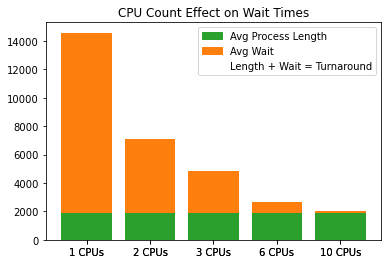

In [80]:
def list_stretch(l, n):
    return [i2 for i in l for i2 in [i]*n]

# from https://stackoverflow.com/a/7946825
def list_interleave(l):
    return [val for tup in zip(*l) for val in tup]
    
df = pd.read_csv(f"{run_dir}/summary.csv")

settings = [f"{i} CPUs" for i in [1,2,3,6,10]] #df['Settings']

colors = list_interleave([["C2"] * len(settings), ["C1"] * len(settings)])
labels = list_stretch(settings, 2)
xs = list_stretch(range(len(settings)), 2)
ys = list_interleave([df['Process Length'], df['Wait']])
bot = list_interleave([[0] * len(settings), ys[::2]])

plt.bar(xs, ys, bottom=bot, color=colors, tick_label=labels)
plt.title("CPU Count Effect on Wait Times")
plt.legend(handles=[mpatches.Patch(color=m[1], label=m[0]) for m in [["Avg Process Length", "C2"], ["Avg Wait", "C1"], ["Length + Wait = Turnaround", "w"]]])
plt.savefig(f"{run_dir}/CPU_vs_wait.{out_type}")

df.head()

In [90]:
run_dir = 'data/RR_201'

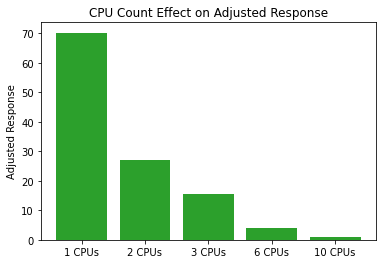

In [93]:
df = pd.read_csv(f"{run_dir}/summary.csv")

cpus = [1,2,3,6,10]
settings = [f"{i} CPUs" for i in cpus] #df['Settings']
color_map = {settings[i]:f"C{i+1}" for i in range(len(settings))}

colors = [color_map[s] for s in [settings[1]]*len(settings)]
labels = settings
xs = range(len(settings))
ys = df['Response Adjusted']

plt.bar(xs, ys, color=colors, tick_label=labels)
plt.title("CPU Count Effect on Adjusted Response")
plt.ylabel("Adjusted Response")
#plt.legend(handles=[mpatches.Patch(color=m[1], label=m[0]) for m in color_map.items()])
plt.savefig(f"{run_dir}/CPU_vs_response.{out_type}")

,Settings,Process Length,Turnaround,Wait,Response,Response Adjusted,Throughput,Throughput INV,Throughput CPU,CPU Processing%
0,4_50_201_7_3,1786,3297.4,1511.3,1317.1,8.2548,0.005794,172.58,43.145,72.219
1,4_50_100_7_3,1786,3461.7,1675.6,1437.9,8.9639,0.005544,180.36,45.090,69.103
2,4_50_50_7_3,1786,3806.0,2020.0,1763.2,11.2200,0.005296,188.82,47.205,66.007
3,4_50_0_7_3,1786,9324.7,7538.7,7016.3,43.9770,0.002355,424.54,106.140,29.358


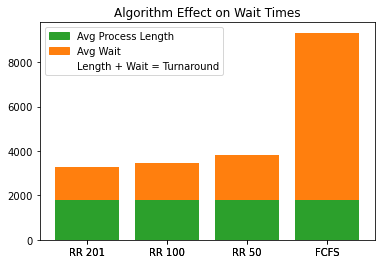

In [68]:
df = pd.read_csv(f"{run_dir}/summary.csv")

settings = ["RR 201", "RR 100", "RR 50", "FCFS"] #df['Settings']

colors = list_interleave([["C2"] * len(settings), ["C1"] * len(settings)])
labels = list_stretch(settings, 2)
xs = list_stretch(range(len(settings)), 2)
ys = list_interleave([df['Process Length'], df['Wait']])
bot = list_interleave([[0] * len(settings), ys[::2]])

plt.bar(xs, ys, bottom=bot, color=colors, tick_label=labels)
plt.title("Algorithm Effect on Wait Times")
plt.legend(handles=[mpatches.Patch(color=m[1], label=m[0]) for m in [["Avg Process Length", "C2"], ["Avg Wait", "C1"], ["Length + Wait = Turnaround", "w"]]])
plt.savefig(f"{run_dir}/Algo_vs_wait.{out_type}")

df.head()

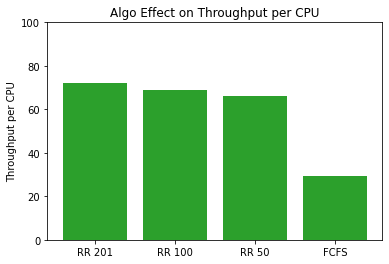

In [73]:
df = pd.read_csv(f"{run_dir}/summary.csv")

settings = ["RR 201", "RR 100", "RR 50", "FCFS"] #df['Settings']
color_map = [{settings[i]:f"C{i+1}" for i in range(len(settings))}]

colors = ["C2"] * len(settings)
labels = settings
xs = range(len(settings))
ys = df['CPU Processing%']

plt.bar(xs, ys, color=colors, tick_label=labels)
plt.title("Algo Effect on Throughput per CPU")
plt.ylabel("Throughput per CPU")
plt.ylim(top=100)
#plt.legend(handles=[mpatches.Patch(color=m[1], label=m[0]) for m in color_map.items()])
plt.savefig(f"{run_dir}/Algo_vs_throughput_cpu.{out_type}")

In [86]:
df.head()

,Settings,Process Length,Turnaround,Wait,Response,Response Adjusted,Throughput,Throughput INV,Throughput CPU,CPU Processing%
0,1_50_0_7_3,1581.4,32622.0,31040.0,28330.0,202.3400,0.000681,1467.50,1467.500,31.081
1,2_50_0_7_3,1581.4,16009.0,14428.0,13155.0,93.3970,0.001324,755.22,377.610,30.198
2,3_50_0_7_3,1581.4,10477.0,8895.9,8142.4,57.6140,0.001905,525.06,175.020,28.957
3,6_50_0_7_3,1581.4,5050.9,3469.5,3228.0,22.7270,0.003398,294.30,49.050,25.831
4,10_50_0_7_3,1581.4,2944.3,1362.9,1369.1,8.7329,0.004894,204.32,20.432,22.324
